CSV_PATH:            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_m

<Figure size 640x480 with 0 Axes>

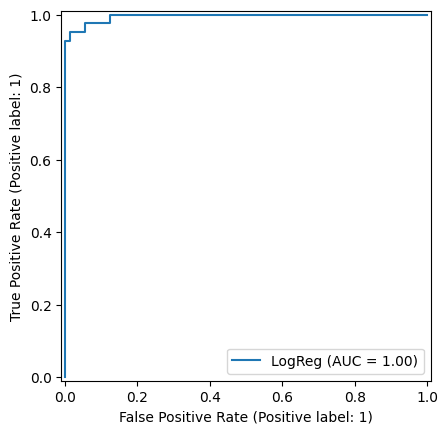

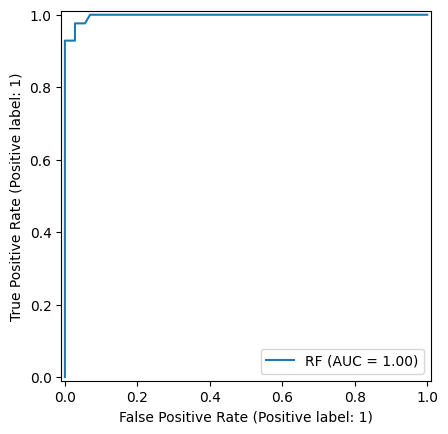

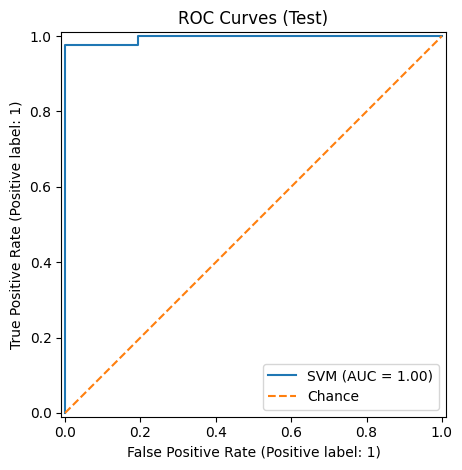

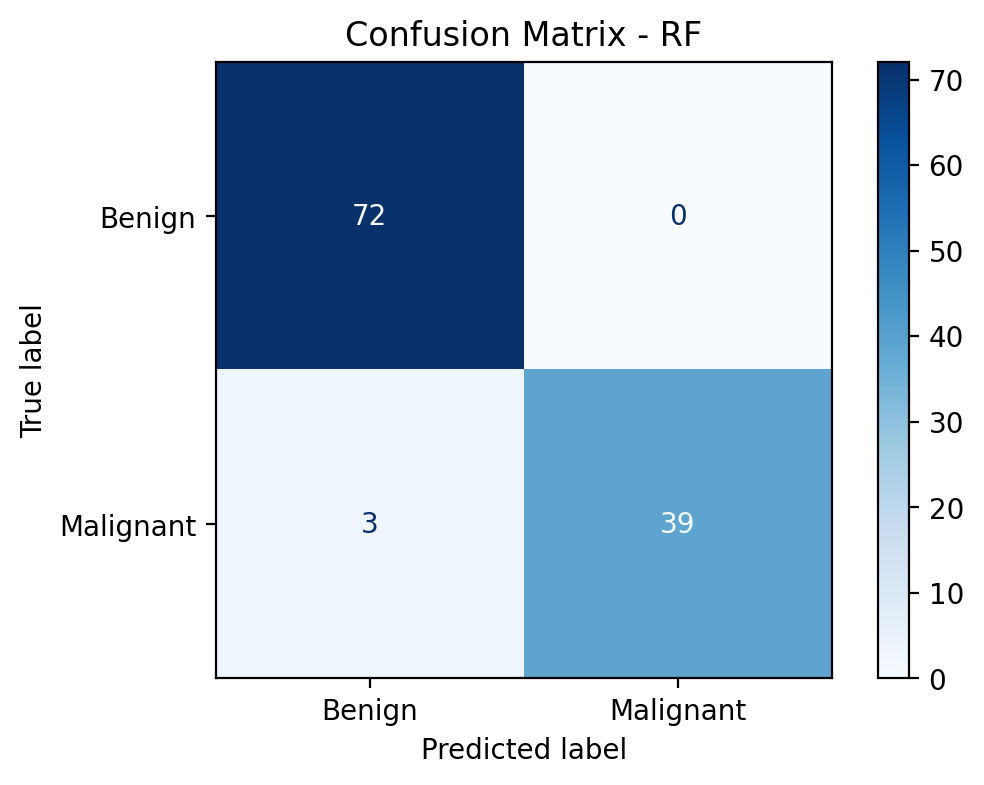

In [4]:
import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load
CSV_PATH = Path("/content/sample_data/data.csv")
df = pd.read_csv(CSV_PATH)
print("CSV_PATH:", df)

# Clean / Prepare
df = df.drop(columns=["id","Unnamed: 32"], errors="ignore")
y = df["diagnosis"].map({"M":1, "B":0}).astype(int)
X = df.drop(columns=["diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Models
models = {
    "LogReg": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),
    "RF": RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced_subsample"
    ),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))
    ]),
}

# Train/Eval
os.makedirs("figures", exist_ok=True)
scores = {}
plt.figure()
for name, model in models.items():
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    preds = model.predict(X_test)
    auc = roc_auc_score(y_test, proba)
    scores[name] = auc
    print(f"\n=== {name} ===")
    print(f"AUC: {auc:.4f}")
    print(classification_report(y_test, preds, target_names=["Benign","Malignant"]))
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)

plt.plot([0,1],[0,1],"--", label="Chance")
plt.title("ROC Curves (Test)")
plt.legend()
plt.tight_layout()
plt.savefig("figures/roc_curves.png", dpi=200)

best_name  = max(scores, key=scores.get)
best_model = models[best_name]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
disp = ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test,
    display_labels=["Benign", "Malignant"],
    cmap=plt.cm.Blues,
    colorbar=True,
    ax=ax
)

ax.set_title(f"Confusion Matrix - {best_name}")
plt.savefig("figures/confusion_matrix.png", dpi=200)

print(f"\nBest model by AUC: {best_name} ({scores[best_name]:.4f})")

# New Section

# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful